In [29]:
import os
import gc
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# OHLCV Data for Bitcoin Perp Market with Technical Indicators
data = pd.read_csv("../data/BTCUSDT-binance-spot-1d-indicators.csv")
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')

## Data Information and Description

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Columns: 180 entries, timestamp to OBV_real
dtypes: datetime64[ns](1), float64(113), int64(66)
memory usage: 3.8 MB


In [34]:
data.describe()

/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myen

,timestamp,open,high,low,close,volume,HT_DCPERIOD_real,HT_DCPHASE_real,HT_PHASOR_inphase,HT_PHASOR_quadrature,...,LINEARREG_SLOPE_real,STDDEV_real,TSF_real,VAR_real,ATR_real,NATR_real,TRANGE_real,AD_real,ADOSC_real,OBV_real
count,2787,2787.000000,2787.000000,2787.000000,2787.000000,2787.000000,2755.000000,2724.000000,2755.000000,2755.000000,...,2774.000000,2783.000000,2774.000000,2.783000e+03,2773.000000,2773.000000,2786.000000,2.787000e+03,2778.000000,2.787000e+03
mean,2021-06-10 00:00:00,29203.618378,29897.959684,28455.765030,29231.553071,66766.426184,21.795389,130.172467,108.631441,-5.346704,...,29.073545,710.744367,29380.153926,1.063446e+06,1433.342744,5.267536,1442.614196,6.125763e+06,15685.909287,6.302765e+05
min,2017-08-17 00:00:00,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,13.052029,-44.986046,-11765.726745,-27987.023093,...,-1731.705758,4.833746,3081.273187,2.336510e+01,86.273436,1.726010,30.540000,-5.833409e+02,-360732.674317,-4.242190e+06
25%,2019-07-14 12:00:00,8700.880000,8908.660000,8408.800000,8708.670000,27554.146968,18.287372,35.998619,-484.123008,-732.724576,...,-85.935434,170.288333,8772.508077,2.899813e+04,427.539327,3.615474,360.920000,1.375278e+06,-4373.525104,-6.150758e+05
50%,2021-06-10 00:00:00,21254.670000,21800.000000,20761.900000,21299.370000,42958.977850,20.882329,155.323324,50.746886,24.433692,...,11.693560,422.163676,21292.161044,1.782222e+05,944.341597,4.693240,841.615000,7.772143e+06,8852.651473,1.832663e+03
75%,2023-05-07 12:00:00,43776.095000,44484.295000,42597.780000,43791.940000,70051.242559,24.452753,203.181147,670.487336,800.373326,...,125.315038,1015.636649,44200.445082,1.031518e+06,2245.328384,5.924598,2020.067500,1.070630e+07,29850.246304,2.032030e+06
max,2025-04-03 00:00:00,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783,38.378714,314.633707,11032.424301,24867.380295,...,1987.532352,5318.372191,107437.059121,2.828508e+07,5296.656289,21.625199,13588.000000,1.247211e+07,472385.805867,4.760994e+06
std,NaN,24740.486762,25261.715694,24186.931122,24756.160984,79169.725302,4.785717,97.458051,1999.214170,3136.423817,...,335.383476,747.321090,24843.913034,2.234860e+06,1210.305161,2.556304,1563.883888,4.476708e+06,52708.445764,1.837231e+06


## Missing Values - Features
- Total 84 missing features and ACOS_real and ASIN_real having 100% missing values, but rest are <3%
- Need to remove feature ACOS_real and ASIN_real
- Need to also check if NaN values are due data from multiple dates are required to start calculations 

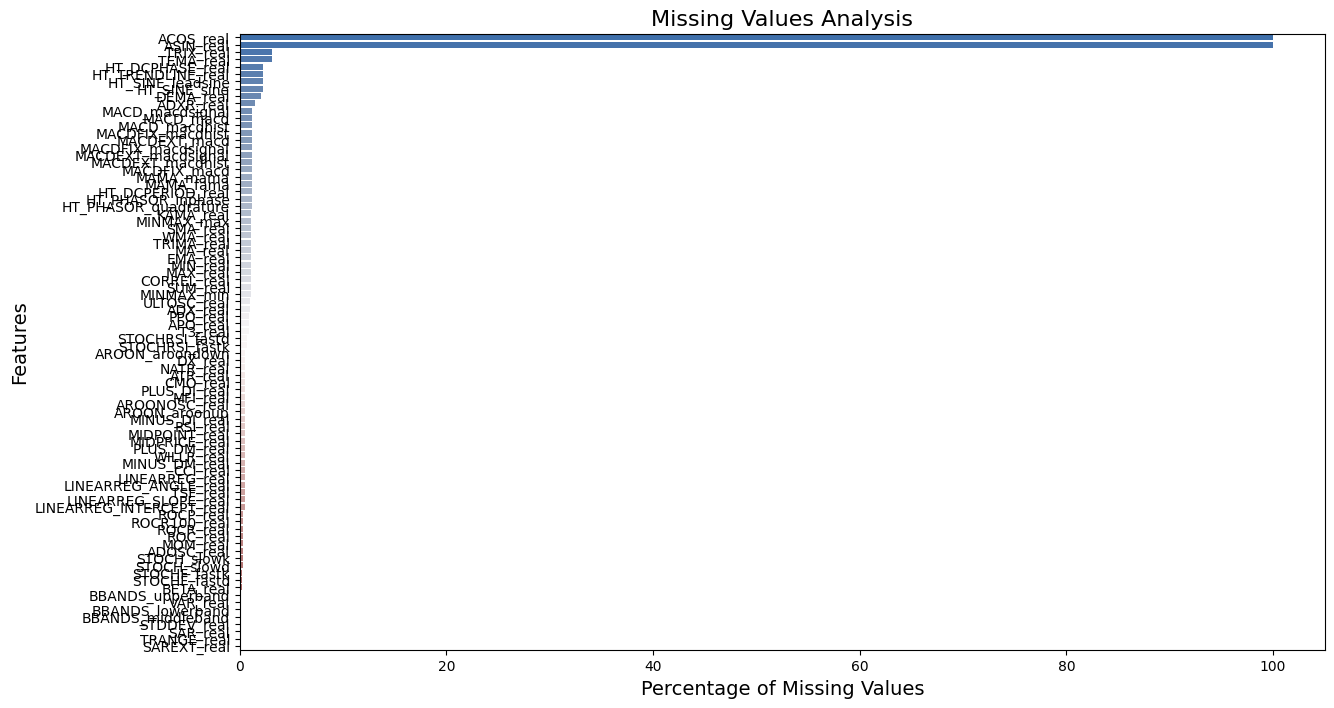

Number of features with missing values :  84


,Feature,MissingCount,MissingPercentage
ACOS_real,ACOS_real,2787,100.000000
ASIN_real,ASIN_real,2787,100.000000
TRIX_real,TRIX_real,88,3.157517
TEMA_real,TEMA_real,87,3.121636
HT_DCPHASE_real,HT_DCPHASE_real,63,2.260495
...,...,...,...
BBANDS_middleband,BBANDS_middleband,4,0.143524
STDDEV_real,STDDEV_real,4,0.143524
SAR_real,SAR_real,1,0.035881
TRANGE_real,TRANGE_real,1,0.035881


In [31]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values/data.shape[0])*100

missing_data = pd.DataFrame({
    "Feature": data.columns,
    "MissingCount": missing_values,
    "MissingPercentage": missing_percentage
}).sort_values(by="MissingPercentage",ascending=False)

missing_data_filtered = missing_data[missing_data["MissingPercentage"] > 0]
plt.figure(figsize=(14, 8))
sns.barplot(
    x="MissingPercentage",
    y="Feature",
    hue="Feature",            # Use the 'Feature' column to assign colors
    data=missing_data_filtered,
    palette="vlag",
    legend=False              # Turn off the legend if not needed
)
plt.title("Missing Values Analysis", fontsize=16)
plt.xlabel("Percentage of Missing Values", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.show()

print("Number of features with missing values : ", len(missing_data_filtered))
missing_data_filtered


In [32]:
data_filtered = data.drop(columns=[col for col in data.columns if data[col].isnull().sum()==data.shape[0]])

## Missing Values - Rows
- We can conclude that NaN exists due to data from multiple dates are required to start calculations 
- We can remove all of the NaN for now, but we can comeback after embedding step to which has a chance that less data can be removed due to existance of NaN

In [38]:
missing_values = data_filtered.isnull().sum(axis=1)
missing_percentage = (missing_values/data_filtered.shape[1])*100

missing_data = pd.DataFrame({
    "Feature": data_filtered['timestamp'],
    "MissingCount": missing_values,
    "MissingPercentage": missing_percentage
}).sort_values(by="MissingPercentage",ascending=False)

missing_data_filtered = missing_data[missing_data["MissingPercentage"] > 0]

print("Number of features with missing values : ", len(missing_data_filtered))
missing_data_filtered


Number of features with missing values :  88


,Feature,MissingCount,MissingPercentage
0,2017-08-17,82,46.067416
2,2017-08-19,79,44.382022
3,2017-08-20,79,44.382022
1,2017-08-18,79,44.382022
4,2017-08-21,74,41.573034
...,...,...,...
70,2017-10-26,2,1.123596
69,2017-10-25,2,1.123596
71,2017-10-27,2,1.123596
72,2017-10-28,2,1.123596


In [41]:
# Suppose your DataFrame is named df
data_clean = data_filtered.dropna()

In [45]:
data.index.values

array([   0,    1,    2, ..., 2784, 2785, 2786])

In [44]:
data_clean.shape
data_clean.describe()

/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:4620: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/donggyulee/anaconda3/envs/myenv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/Users/donggyulee/anaconda3/envs/myen

,timestamp,open,high,low,close,volume,HT_DCPERIOD_real,HT_DCPHASE_real,HT_PHASOR_inphase,HT_PHASOR_quadrature,...,LINEARREG_SLOPE_real,STDDEV_real,TSF_real,VAR_real,ATR_real,NATR_real,TRANGE_real,AD_real,ADOSC_real,OBV_real
count,2699,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,2699.000000,...,2699.000000,2699.000000,2699.000000,2.699000e+03,2699.000000,2699.000000,2699.000000,2.699000e+03,2699.000000,2.699000e+03
mean,2021-07-24 00:00:00,29995.338303,30706.241300,29229.623105,30023.568670,68903.727117,21.778738,129.638286,106.188122,-6.035638,...,28.849669,727.167884,30054.064071,1.095194e+06,1462.803410,5.208483,1476.621641,6.325306e+06,16126.170746,6.507451e+05
min,2017-11-13 00:00:00,3211.710000,3276.500000,3156.260000,3211.720000,1254.292531,13.052029,-44.986046,-11765.726745,-27987.023093,...,-1731.705758,4.833746,3081.273187,2.336510e+01,86.273436,1.726010,30.540000,1.191550e+04,-360732.674317,-4.242190e+06
25%,2019-09-18 12:00:00,9142.130000,9312.665000,8866.200000,9146.460000,28803.379615,18.242183,35.311666,-498.219725,-738.880967,...,-92.545978,175.849611,9183.137088,3.092309e+04,449.928168,3.585871,376.500000,1.536138e+06,-4760.080887,-6.366050e+05
50%,2021-07-24 00:00:00,22797.150000,23350.250000,22341.460000,22818.370000,43830.254467,20.856078,153.650367,46.427775,24.433692,...,10.436022,440.837440,23123.147033,1.943376e+05,971.362172,4.633187,900.710000,7.927665e+06,9576.598668,8.554371e+03
75%,2023-05-29 12:00:00,44410.630000,45850.315000,43299.050000,44466.235000,71357.423145,24.418620,203.360675,679.420998,813.389422,...,127.172571,1043.922895,44928.293187,1.089775e+06,2279.290222,5.874889,2088.940000,1.071473e+07,30491.811462,2.111106e+06
max,2025-04-03 00:00:00,106143.820000,109588.000000,105321.490000,106143.820000,760705.362783,38.378714,314.633707,11032.424301,24867.380295,...,1987.532352,5318.372191,107437.059121,2.828508e+07,5296.656289,21.625199,13588.000000,1.247211e+07,472385.805867,4.760994e+06
std,NaN,24741.863874,25263.214418,24188.422183,24757.746681,79545.823112,4.804644,97.740278,2019.015609,3167.640415,...,339.863055,752.748966,24850.212558,2.261994e+06,1213.423312,2.542921,1576.663032,4.408296e+06,53410.570847,1.863395e+06
